In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data source - https://www.kaggle.com/residentmario/ramen-ratings
#instant ramen noodle star ratings 0 to 5

In [3]:
ramen_df = pd.read_csv('ramen-ratings.csv')

In [4]:
ramen_df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [5]:
ramen_df['Country'].value_counts()

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Holland            4
Poland             4
Fiji               4
Sarawak            3
Sweden             3
Finland            3
Dubai              3
Estonia            2
Ghana              2
Nigeria            1
United States      1
Name: Country, dtype: int64

In [6]:
ramen_df['Stars'] = pd.to_numeric(ramen_df['Stars'], errors='coerce')

In [7]:
ramen_df.groupby('Country').describe()['Stars'].sort_values(by='count', ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Japan,352.0,3.981605,0.913755,0.0,3.50,4.00,4.75,5.0
USA,323.0,3.457043,1.055773,0.0,3.00,3.50,4.00,5.0
South Korea,307.0,3.790554,0.869436,0.0,3.50,3.75,4.25,5.0
Taiwan,224.0,3.665402,1.155595,0.0,3.25,3.75,4.50,5.0
Thailand,191.0,3.384817,0.979476,0.1,3.00,3.50,4.00,5.0


In [8]:
#null hypothesis - there is no difference in star ratings between ramen in the USA and Japan
#alternative - star ratings for ramen made in Japan are higher than that of the USA
#alpha - 0.05

In [9]:
jp_ramen_df = ramen_df.loc[ramen_df['Country']=='Japan']

In [10]:
jp_ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 2568
Data columns (total 7 columns):
Review #    352 non-null int64
Brand       352 non-null object
Variety     352 non-null object
Style       352 non-null object
Country     352 non-null object
Stars       352 non-null float64
Top Ten     6 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 22.0+ KB


In [11]:
usa_ramen_df = ramen_df.loc[ramen_df['Country']=='USA']

In [12]:
usa_ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 2 to 2579
Data columns (total 7 columns):
Review #    323 non-null int64
Brand       323 non-null object
Variety     323 non-null object
Style       323 non-null object
Country     323 non-null object
Stars       323 non-null float64
Top Ten     1 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 20.2+ KB


In [13]:
jp_stars = jp_ramen_df['Stars']
usa_stars = usa_ramen_df['Stars']

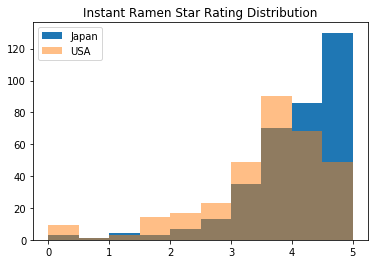

In [31]:
plt.hist(jp_stars, label='Japan');
plt.hist(usa_stars, label='USA', alpha=0.5);
plt.title('Instant Ramen Star Rating Distribution')
plt.legend()

In [15]:
#def bootstrap_sample(sample):
#    n = len(sample)
#    boot_sample = np.random.choice(sample, size=n)
#    return boot_sample

In [16]:
n = 100000
jp_bootstrap_samples = []
usa_bootstrap_samples = []
jp_bootstrap_means = np.zeros(n)
usa_bootstrap_means = np.zeros(n)
for i in range(n):
    jp_bootstrap = np.random.choice(jp_stars, size=len(jp_stars))
    usa_bootstrap = np.random.choice(usa_stars, size=len(usa_stars))
    #jp_bootstrap.append(jp_bootstrap)
    #usa_bootstrap.append(bootstrap_sample(usa_bootstrap))
    jp_bootstrap_means[i] = (jp_bootstrap.mean())
    usa_bootstrap_means[i] = (usa_bootstrap.mean())

In [17]:
1-sum((jp_bootstrap_means - usa_bootstrap_means)>0.2)/n

9.99999999995449e-06

In [18]:
p_dict = {}
for p in range(0, 10):
    p_dict['0.'+str(p)] = 1-sum(((jp_bootstrap_means - usa_bootstrap_means)>(p/10)))/n

In [19]:
#effect magnitude(left) compared to p-value(right)
p_dict

{'0.0': 0.0,
 '0.1': 0.0,
 '0.2': 9.99999999995449e-06,
 '0.3': 0.0016899999999999693,
 '0.4': 0.05157999999999996,
 '0.5': 0.3729,
 '0.6': 0.83995,
 '0.7': 0.98852,
 '0.8': 0.99983,
 '0.9': 1.0}

In [20]:
#reject null hypothesis
#on average instant ramen from Japan have higher rating than those from USA
#with alpha of 0.05, null hypothesis can be rejected up to difference in mean star rating of 0.3

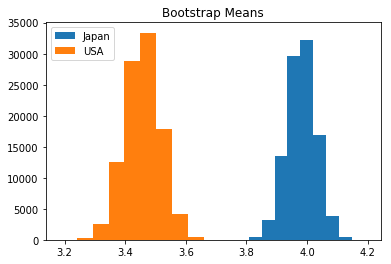

In [30]:
plt.hist(jp_bootstrap_means, label='Japan');
plt.hist(usa_bootstrap_means, label='USA');
plt.title('Bootstrap Means')
plt.legend()

In [26]:
jp_stars.unique()

array([3.75 , 4.   , 0.25 , 4.5  , 4.75 , 1.5  , 3.5  , 5.   , 4.25 ,
       2.   , 2.5  , 3.   , 1.75 , 3.8  , 4.3  , 0.   , 0.75 , 2.75 ,
       3.25 , 1.   , 2.25 , 1.25 , 4.125])

In [29]:
usa_stars.unique()

array([2.25 , 5.   , 4.75 , 1.5  , 3.5  , 3.75 , 0.   , 3.25 , 4.   ,
       2.5  , 3.   , 2.   , 4.25 , 1.   , 0.25 , 4.5  , 2.75 , 1.75 ,
       1.25 , 2.125, 0.5  ])

In [33]:
#utilize traditional AB testing methods, t-test
from scipy import stats

In [35]:
t, p= stats.ttest_ind(jp_stars, usa_stars, equal_var=False)
t, p/2

(6.874240416647977, 7.418597906572842e-12)

In [ ]:
#welch t-test result agree with bootstrapping, but less extreme